In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset


c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

In [3]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [5]:
date_count=df.job_posted_date.value_counts()
date_count=date_count.sort_index()

In [8]:
df['job_posted_mounth']=df.job_posted_date.dt.month

In [9]:
mounth_count=df.job_posted_mounth.value_counts()
mounth_count=mounth_count.sort_index()
mounth_count

job_posted_mounth
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: count, dtype: int64

In [13]:
df['job_posted_mounth']=df['job_posted_date'].dt.month

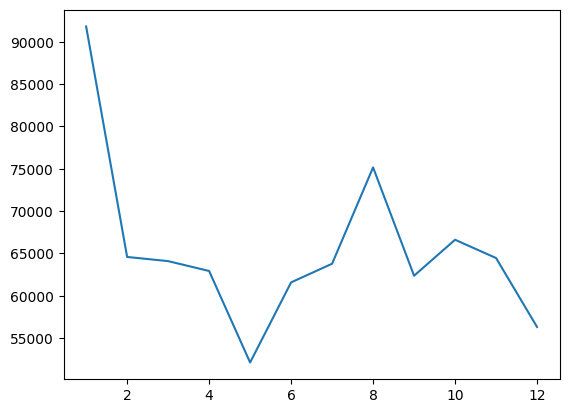

In [15]:
plt.plot(mounth_count.index,mounth_count)


In [21]:
job_count=df.job_title_short.value_counts(3)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cloud Engineer'),
  Text(1, 0, 'Machine Learning Engineer'),
  Text(2, 0, 'Senior Data Analyst'),
  Text(3, 0, 'Senior Data Scientist'),
  Text(4, 0, 'Senior Data Engineer'),
  Text(5, 0, 'Software Engineer'),
  Text(6, 0, 'Business Analyst'),
  Text(7, 0, 'Data Scientist'),
  Text(8, 0, 'Data Engineer'),
  Text(9, 0, 'Data Analyst')])

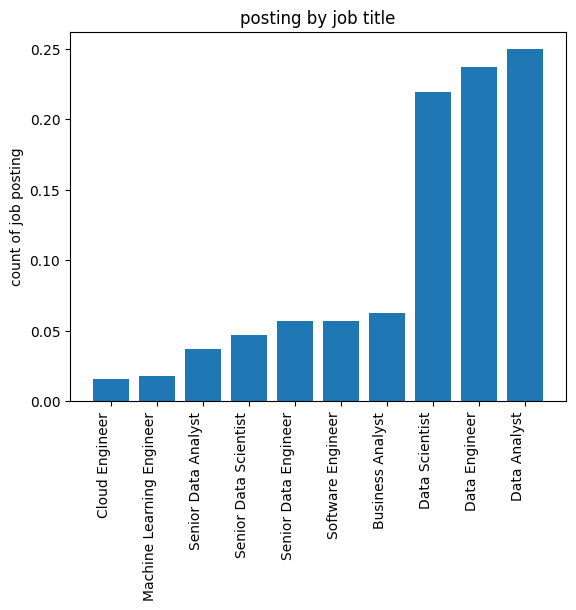

In [52]:

plt.bar(job_count.index,job_count)
plt.title('posting by job title')
plt.ylabel('count of job posting')

plt.xticks(rotation=90,ha='right')

<Axes: xlabel='job_title_short'>

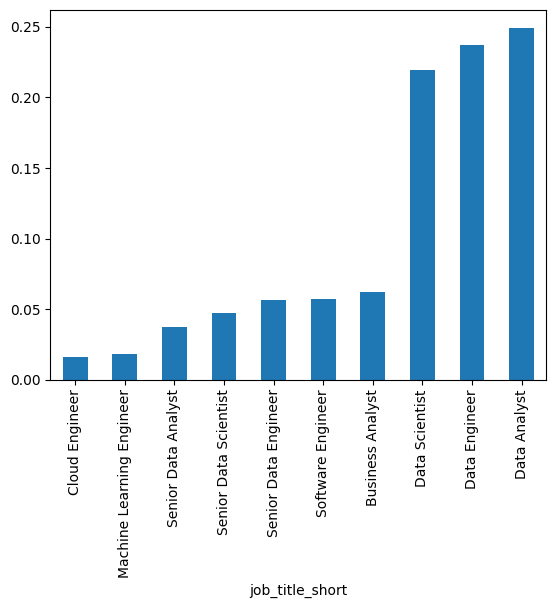

In [56]:
job_count.plot(kind='bar')

<Axes: xlabel='job_posted_mounth'>

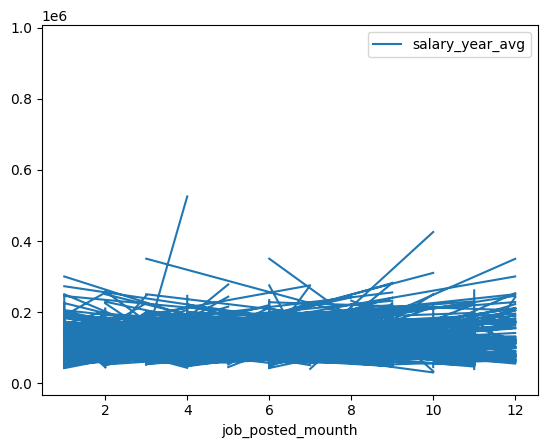

In [76]:

df.plot(x='job_posted_mounth',y='salary_year_avg',kind='line')

In [72]:
df['job_posted_mounth'].head(5)

0     6
1     1
2    10
3     7
4     8
Name: job_posted_mounth, dtype: int32

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

Text(0.5, 1.0, 'g')

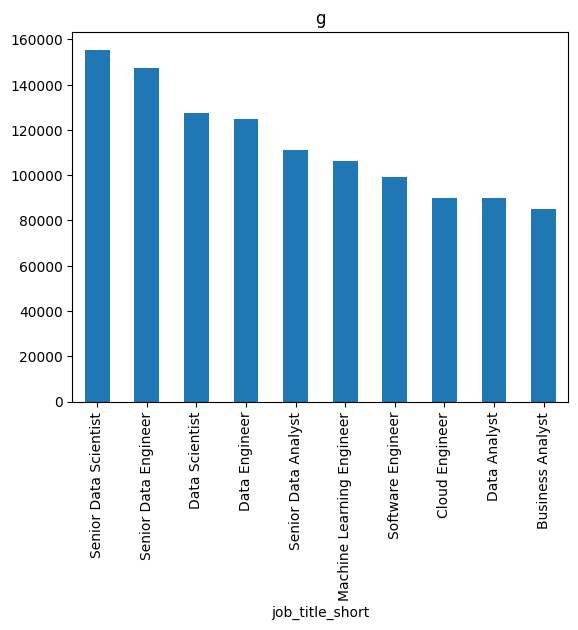

In [21]:

df.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).plot.bar()
plt.title('g')


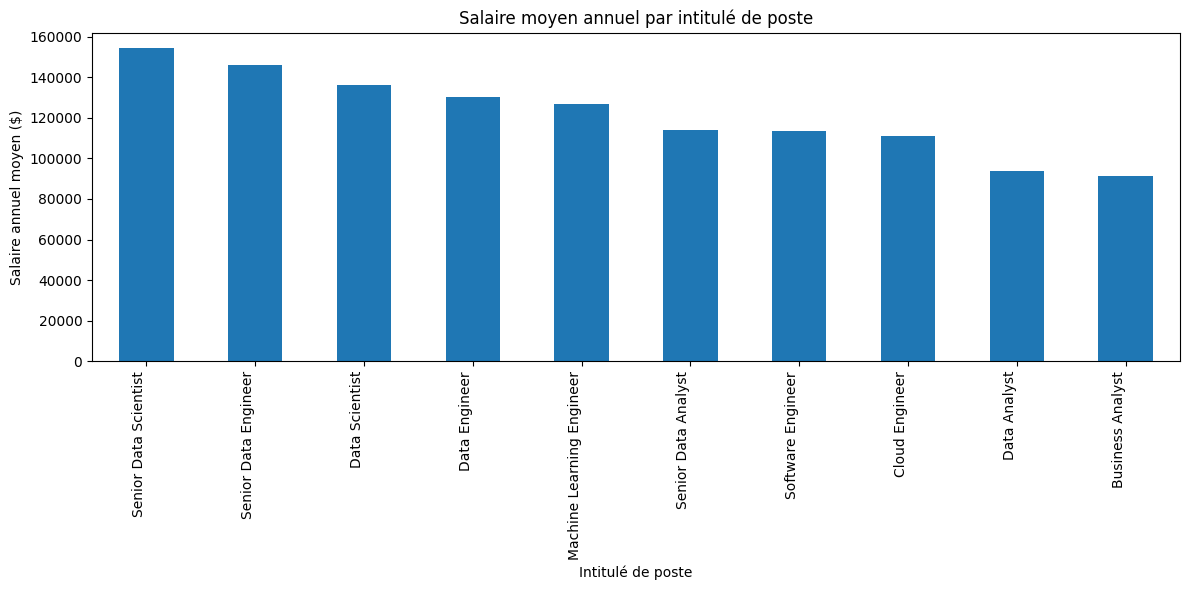

In [20]:
df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False).plot.bar(figsize=(12, 6))
plt.title('Salaire moyen annuel par intitulé de poste')
plt.ylabel('Salaire annuel moyen ($)')
plt.xlabel('Intitulé de poste')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()